In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

df = pd.read_csv("data.csv")
#print(df.columns)
Y = df['MEDV']
X = df[['RM', 'AGE']]

#print(X.head())
#print(y.head())
#plot 3D graph
"""
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['RM'], X['AGE'], Y, c='r', marker='o')
ax.set_xlabel('RM')
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')
plt.show()
"""

In [ ]:
import sys
import importlib
from sklearn.preprocessing import StandardScaler

sys.path.append('../')
import customlosslr as cl
importlib.reload(cl)

lm = LinearRegression()
lm.fit(X, Y)

cm = cl.custom_loss_lr(loss=cl.residual_sum_square)
cm.fit(X, Y)
beta_hat = cm.get_beta()

print("Intecept: %14.5e %14.5e"%(cm.get_intecept(), lm.intercept_))
for i, c in enumerate(cm.get_coefficients()):
        print("Coefficient[%4d] %14.5e %14.5e"%(i, c, lm.coef_[i]))

#print(result)
optlf = cl.mean_absolute_percentage_error(cm.predict(X), Y)
lrlf = cl.mean_absolute_percentage_error(lm.predict(X), Y)

print("        Optimized final loss function: %10.5f"%(optlf))
print("Linear Regression FINAL loss function: %10.5f"%(lrlf))

# scatter plot
plt.scatter(Y, cm.predict(X))
plt.scatter(Y, lm.predict(X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
Y = df['MEDV']
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', \
        'RM', 'AGE', 'DIS', 'RAD', 'TAX', \
                'PTRATIO', 'B', 'LSTAT',]]

lm = LinearRegression()
lm.fit(X, Y)

cm = cl.custom_loss_lr(loss=cl.residual_sum_square)
cm.fit(X, Y)

cmr = cl.custom_loss_lr(loss=cl.residual_sum_square, normalize=True, l2regular=0.1)
cmr.fit(X, Y)

print("Intecept: %14.5e %14.5e %14.5e"%(lm.intercept_, cm.get_intecept(), cmr.get_intecept()))
for i, c in enumerate(cm.get_coefficients()):
        print("Coefficient[%4d] %14.5e %14.5e %14.5e"%(i, lm.coef_[i], c, cmr.get_coefficients()[i]))

#print(result)
optlf = cl.mean_absolute_percentage_error(cm.predict(X), Y)
optrlf = cl.mean_absolute_percentage_error(cmr.predict(X), Y)
lrlf = cl.mean_absolute_percentage_error(lm.predict(X), Y)

print("                Optimized final loss function: %10.5f"%(optlf))
print("Optimized final loss function with L2 regular: %10.5f"%(optrlf))
print("        Linear Regression FINAL loss function: %10.5f"%(lrlf))


# scatter plot
plt.scatter(Y, cm.predict(X))
plt.scatter(Y, lm.predict(X))
plt.scatter(Y, cmr.predict(X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

Intecept:    2.07630e+01    2.04050e+01
Coefficient[   0]   -1.00854e+00   -9.40738e-01
Coefficient[   1]    1.06762e+00    7.52628e-01
Coefficient[   2]    2.45215e-01    3.62031e-01
Coefficient[   3]    5.62883e-01    5.28055e-01
Coefficient[   4]   -9.99509e-01   -1.00663e+00
Coefficient[   5]    1.98677e+00    1.81892e+00
Coefficient[   6]   -7.99617e-01   -7.76071e-01
Coefficient[   7]   -1.80613e+00   -1.44596e+00
Coefficient[   8]    1.35664e+00    9.04068e-01
Coefficient[   9]   -1.94617e+00   -1.47953e+00
Coefficient[  10]   -1.43786e+00   -1.36478e+00
Coefficient[  11]    8.10254e-01    7.85673e-01
Coefficient[  12]   -2.36408e+00   -2.34425e+00
                Optimized final loss function:   14.03840
Optimized final loss function with L2 regular:   14.14078


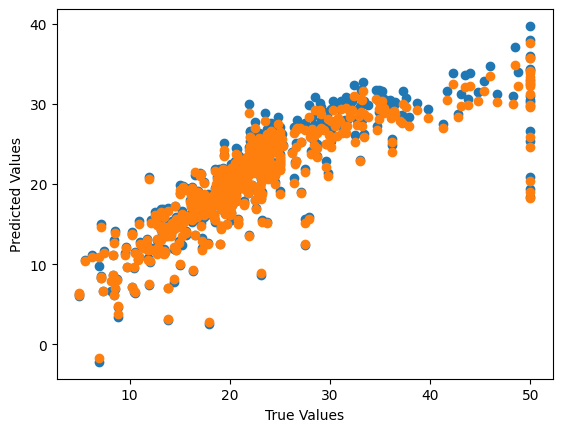

In [13]:
Y = df['MEDV']
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', \
        'RM', 'AGE', 'DIS', 'RAD', 'TAX', \
                'PTRATIO', 'B', 'LSTAT',]]

cm = cl.custom_loss_lr(loss=cl.mean_absolute_percentage_error, normalize=True, l2regular=0.0)
cm.fit(X, Y)

cmr = cl.custom_loss_lr(loss=cl.mean_absolute_percentage_error, normalize=True, l2regular=0.01)
cmr.fit(X, Y)

print("Intecept: %14.5e %14.5e"%(cm.get_intecept(), cmr.get_intecept()))
for i, c in enumerate(cm.get_coefficients()):
        print("Coefficient[%4d] %14.5e %14.5e"%(i, c, cmr.get_coefficients()[i]))

#print(result)
optlf = cl.mean_absolute_percentage_error(cm.predict(X), Y)
optrlf = cl.mean_absolute_percentage_error(cmr.predict(X), Y)

print("                Optimized final loss function: %10.5f"%(optlf))
print("Optimized final loss function with L2 regular: %10.5f"%(optrlf))


# scatter plot
plt.scatter(Y, cm.predict(X))
plt.scatter(Y, cmr.predict(X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()